In [1]:
from utils.MLP import MLPSequential
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import get_df, set_data_for_model, set_data_for_model_with_eval
import seaborn as sns

import pandas as pd

In [2]:
data_path = 'data/data.csv'
df = get_df(data_path)

(X_train, X_valid, X_eval, y_train,
y_valid,y_eval) = set_data_for_model_with_eval(
                                    df, random_state=None, eval_size=10
                                    )

In [3]:
input_size = X_train.shape[1]

model = MLPSequential(input_size)

model.Dense(24, 'relu')
model.Dense(48, 'relu')
model.Dense(2, 'softmax')

model.compile()

Added layer with 24 neurons and relu activation.
Added layer with 48 neurons and relu activation.
Added layer with 2 neurons and softmax activation.
Model compiled successfully.


In [4]:
model.fit(X_train, y_train, epochs=100000, learning_rate=0.0349,
            validation_data=(X_valid, y_valid), early_stopping_patience=5)

Epoch 1/100000 - loss: 0.8012 - val_loss: 0.7094 - accuracy: 0.3982 - val_accuracy: 0.5804
Epoch 2/100000 - loss: 0.7368 - val_loss: 0.6656 - accuracy: 0.5123 - val_accuracy: 0.6964
Epoch 3/100000 - loss: 0.6833 - val_loss: 0.6272 - accuracy: 0.6085 - val_accuracy: 0.7232
Epoch 4/100000 - loss: 0.6381 - val_loss: 0.5934 - accuracy: 0.6935 - val_accuracy: 0.7946
Epoch 5/100000 - loss: 0.5992 - val_loss: 0.5631 - accuracy: 0.7740 - val_accuracy: 0.8214
Epoch 6/100000 - loss: 0.5653 - val_loss: 0.5359 - accuracy: 0.8233 - val_accuracy: 0.8482
Epoch 7/100000 - loss: 0.5352 - val_loss: 0.5112 - accuracy: 0.8434 - val_accuracy: 0.8661
Epoch 8/100000 - loss: 0.5082 - val_loss: 0.4886 - accuracy: 0.8546 - val_accuracy: 0.8929
Epoch 9/100000 - loss: 0.4837 - val_loss: 0.4678 - accuracy: 0.8702 - val_accuracy: 0.9018
Epoch 10/100000 - loss: 0.4613 - val_loss: 0.4487 - accuracy: 0.8859 - val_accuracy: 0.9107
Epoch 11/100000 - loss: 0.4407 - val_loss: 0.4311 - accuracy: 0.8993 - val_accuracy: 0.91

In [5]:
model.evaluate(X_valid, y_valid)

Test Loss: 0.1138 - Test Accuracy: 0.9464


(0.11375173542814211, 0.9464285714285714)

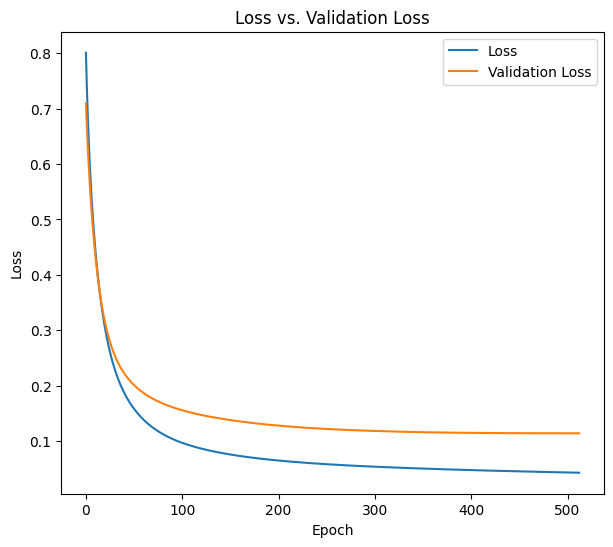

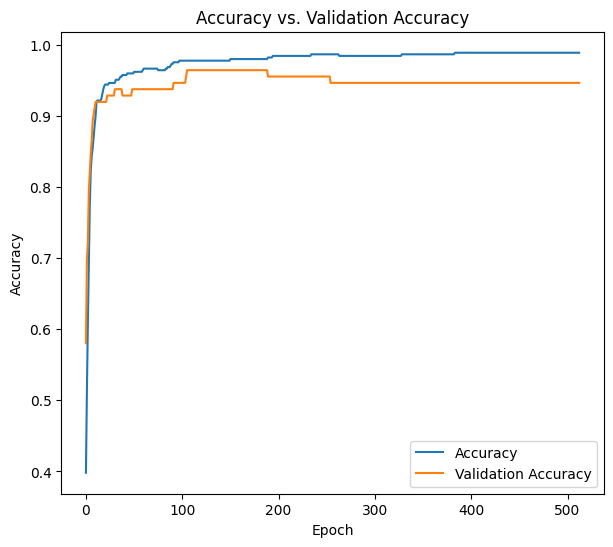

In [6]:
model.plot_loss()
model.plot_accuracy()

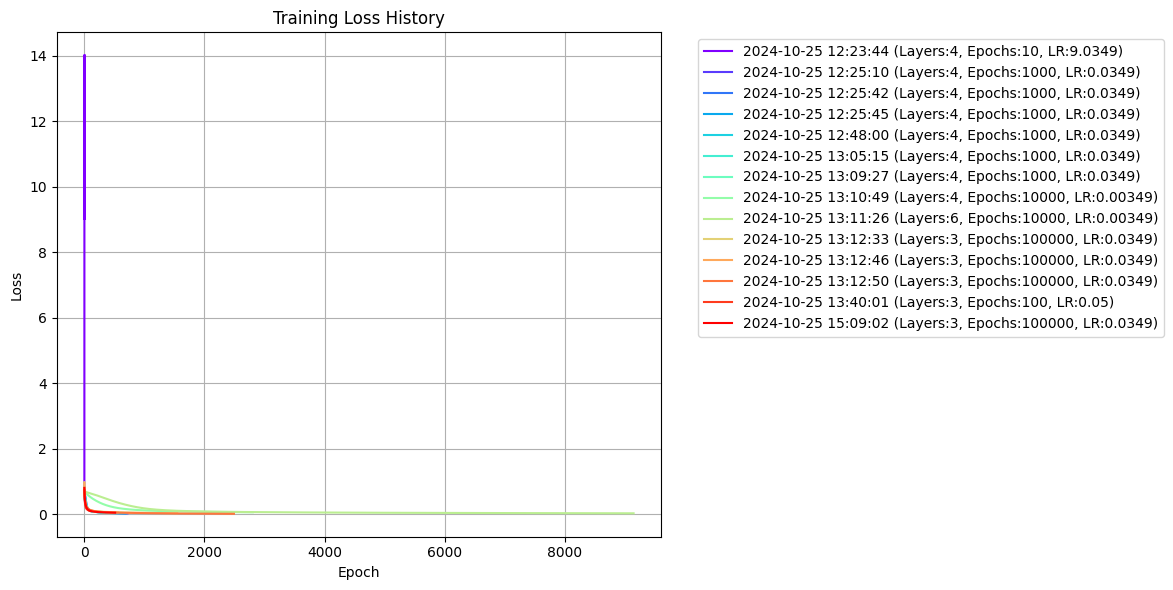

In [7]:
model.save_and_plot_history()

In [8]:
y_pred = model.predict(X_eval)

In [9]:
print(f"{'Subject':<10}{'Real diagnosis':<17}{'Predicted diagnosis':<22}{'Result':<17}\n")

for i, (pred, real) in enumerate(zip(y_pred, y_eval)):
    pred_txt = "Benign" if pred == 0 else "Malignant"
    real_txt = "Benign" if real == 0 else "Malignant"
    result = "Success" if pred_txt == real_txt else "Fail"
    print(f"{i:<10}{real_txt:<17}{pred_txt:<22}{result:<17}")

Subject   Real diagnosis   Predicted diagnosis   Result           

0         Benign           Benign                Success          
1         Benign           Benign                Success          
2         Malignant        Malignant             Success          
3         Benign           Benign                Success          
4         Benign           Benign                Success          
5         Malignant        Malignant             Success          
6         Benign           Benign                Success          
7         Benign           Benign                Success          
8         Malignant        Malignant             Success          
9         Benign           Benign                Success          
